In [44]:
import random
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img

In [45]:
dataTrain = pathlib.Path("/Users/saninzulphi/Downloads/lab6/Train/")
dataTest = pathlib.Path("/Users/saninzulphi/Downloads/lab6/Test/")

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_dataset(train_dir, test_dir, img_height=180, img_width=180, batch_size=32, validation_split=0.2):
    train_datagen = ImageDataGenerator(
        rescale=1./255
    )
    
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        subset='training',
        seed=123
    )
    
    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        subset='validation', 
        seed=123
    )
    
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False
    )

    return train_generator, validation_generator, test_generator


train_dir = "/Users/saninzulphi/Downloads/lab6/Train/"
test_dir = "/Users/saninzulphi/Downloads/lab6/Test/"


train_generator, validation_generator, test_generator = preprocess_dataset(train_dir, test_dir)
print("Class Names:", train_generator.class_indices)

Found 2239 images belonging to 9 classes.
Found 0 images belonging to 9 classes.
Found 118 images belonging to 9 classes.
Class Names: {'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}


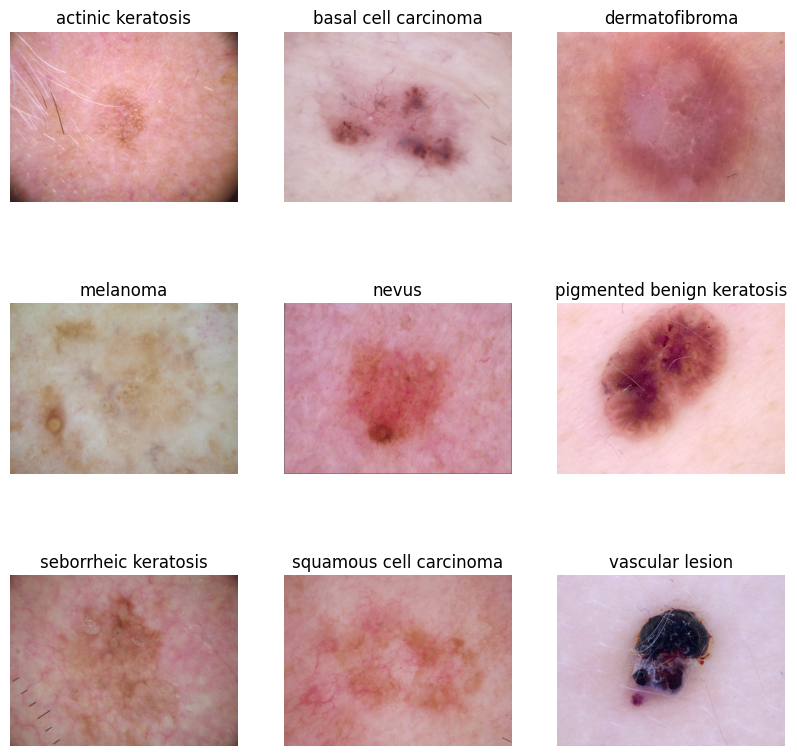

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import pathlib

num_classes = len(train_generator.class_indices)

# Get the class names
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(10,10))
for i in range(num_classes):
    plt.subplot(3,3,i+1)
    
    # Get the first image for the class
    image_path = list(pathlib.Path(train_dir, class_names[i]).glob('*.jpg'))[0]
    image = img.imread(str(image_path))
    
    plt.imshow(image)
    plt.title(class_names[i])
    plt.axis('off')

plt.show()

In [51]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Set base model layers as non-trainable
base_model_vgg16.trainable = False

# Create custom model on top of VGG16
vgg16_model = Sequential([
    base_model_vgg16,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Print model summary
vgg16_model.summary()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)